In [1]:
%run ../talktools.py

# Meeting/Lecture 17 - March 14

## Office Hours
* Josh (Mon 12-1, 355 Campbell), Aaron canceled  (*not* Fri 12-1pm, 425 Campbell)
* Peter (Tue 1-2pm; 355), 
* Saahit: Wed 5-6pm (355) and Thu 4-5pm (233)
* by appt
* Communications on Ed Discussion

## Agenda

* Introduction (this notebook, *00_Introduction*)
* Wavelength interpolation issue
* Group discussion + report out
* Finish walking through Ness et al. (*01_The_Cannon*)
* Work/question time

## Lab 2
* Checkpoint 1 is now due __today__ by 11:59pm
* Checkpoint 2 due next Weds (10/23)
* Checkpoint 3 due Weds (10/30)
* Lab report due Friday 11/1
 

## Getting these notebooks 
```bash
git clone https://github.com/ucb-datalab/course_materials_fall2024.git
cd course_materials_fall2024
jupyter notebook
```

## Wavelength interpolation issue
* Essence of the issue: wavelength grid generated from .FITS files and continuum pixels are on slightly different wavelength scales
* Correct way to resolve: interpolate spectrum from FITS files onto provided wavelength grid
 - yields improved continnum normalization
* It turns out that if you don't do this,  you can still do pretty well
 - fits should look OK and scatter/bias/etc are still acceptably small


In [2]:
import numpy as np
import pylab as plt
from astropy.io import fits

# load continuum pixels
continuum = np.load('../../labs/lab2_data/cannon_continuum_apogee.npz')
# load apogee wavelength grid
apogee_wl = np.load('../../labs/lab2_data/apogee_wavelength.npz')

# load example spectrum
hdr = fits.getheader('../../labs/lab2_data/mystery_spec_wiped.fits')
spec = fits.getdata('../../labs/lab2_data/mystery_spec_wiped.fits')

# build wavelength grid from spectrum file
wl = 10**np.arange(hdr['crval1'], hdr['crval1']+len(spec)*hdr['cdelt1'], hdr['cdelt1'])


# interpolate specturm onto new grid
new_spec = np.interp(apogee_wl['wavelength'], wl, spec)

In [3]:
len(spec)

8575

Text(0, 0.5, 'Flux (Arbitrary units)')

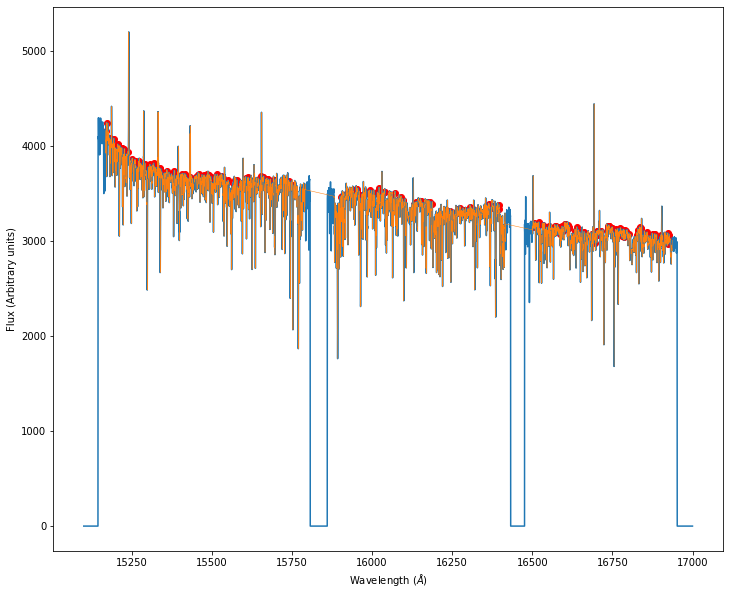

In [4]:
plt.figure(figsize=(12,10))
plt.plot(wl, spec)
plt.plot(apogee_wl['wavelength'], new_spec, lw=0.5
        )
plt.scatter(continuum['wavelengths'][continuum['trusted']], new_spec[continuum['trusted']], c='r' )
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (Arbitrary units)')

Text(0, 0.5, 'Flux (Arbitrary units)')

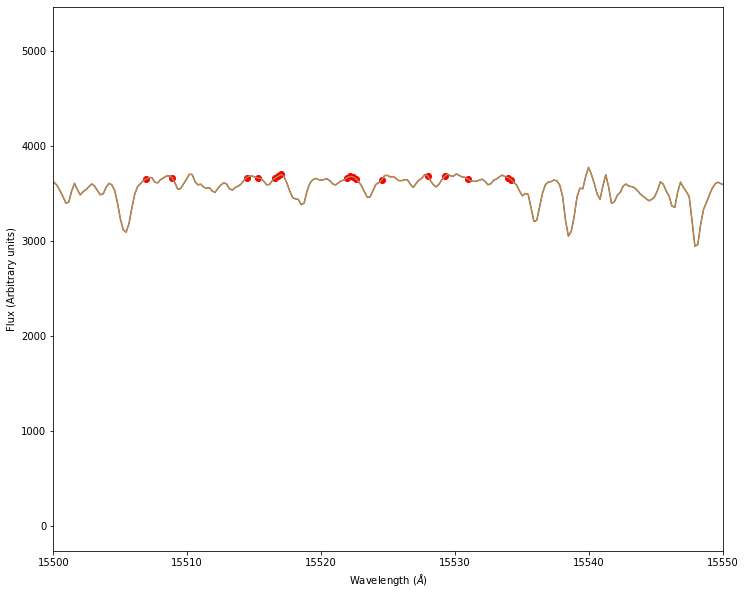

In [5]:
plt.figure(figsize=(12,10))
plt.plot(wl, spec)
plt.plot(apogee_wl['wavelength'], new_spec, lw=1
        )
plt.scatter(continuum['wavelengths'][continuum['trusted']], new_spec[continuum['trusted']], c='r' )
plt.xlim(15500, 15550)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (Arbitrary units)')

## Checkpoint 1 discussion topics
* How easy/challenging was it to access the data? How did it compare to using ADQL?
* Do you understand the physical meanings of T$_{\rm eff}$, log(g), and [Fe/H]?
* Do you have any better understanding of bitmasks?
* Does your normalized continnuum look reasonable to you?
* Do you have questions on linear models and/or optimization yet?